For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset

Import packages

Import pandas, numpy, matplotlib, statsmodels, and scipy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [ ]:
pd.read_csv("c4 epa air dataset.csv")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [ ]:
ads = pd.read_csv("c4 epa air dataset.csv")

In [ ]:
ads.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


Question: Based on the first few rows of the data, in what unit are aqi values expressed?

As the units_of_measure column contains parts per million, you can infer that the aqi values are measured in parts per million.

we use the describe(include='all') to get the description of the data in the DataFrames

In [ ]:
ads.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


Question: Based on the table of descriptive statistics generated above, what do you notice about the count value for the aqi column?**

The count value for the aqi column is 260. This means there are 260 AQI measurements represented in this dataset.

Now, use the mean() function on the aqi column and assign the value to a variable population_mean. The value should be the same mean value the describe() function produced for the 'aqi' column.

In [ ]:
population_mean = ads['aqi'].mean()

NameError: ignored

**Sample with replacement**

First, name a new variable sampled_data. Then, set the arguments for the sample function N, sample size, equal to 50. Set replace equal to “True” to specify sampling with replacement. For random_state, choose an arbitrary number for random seed. Make that arbitrary number 42.

In [ ]:
sampled_data = ads.sample(n=50, replace=True, random_state=42)

In [ ]:
sampled_data.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [ ]:
sample_mean = sampled_data['aqi'].mean()

Apply the central limit theorem
Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the central limit theorem, the mean of a sampling distribution should be roughly equal to the population mean. Follow the steps below to compute the mean of the sampling distribution with 10,000 samples.

Create an empty list and assign it to a variable called estimate_list.
Iterate through a for loop 10,000 times. To do this, make sure to utilize the range() function to generate a sequence of numbers from 0 to 99,999.
In each iteration of the loop, use the sample() function to take a random sample (with replacement) of 50 AQI values from the population. Do not set random_state to a value.
Use the list append() function to add the value of the sample mean to each item in the list.

In [ ]:
estimate_list = []
for i in range(10000):
    estimate_list.append(ads['aqi'].sample(n=50,replace=True).mean())

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable estimate_df.


In [ ]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,7.04
1,7.36
2,7.40
3,5.24
4,5.76
...,...
9995,7.38
9996,5.96
9997,5.28
9998,8.28


Next, compute the mean() of the sampling distribution of 10,000 random samples and store the result in a new variable mean_sample_means

In [ ]:

mean_sample_means = estimate_df['estimate'].mean()

mean_sample_means

6.759332

**Question:**

 How are the central limit theorem and random sampling (with replacement) related?

Random sampling with replacement is related to the central limit theorem because it means you are drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error.

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

<Axes: >

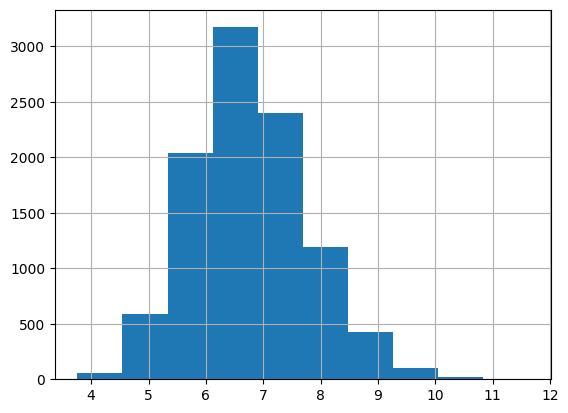

In [ ]:
estimate_df['estimate'].hist()

**Calculate the standard error**

Calculate the standard error of the statistic. The standard error of a statistic is the standard deviation of the sampling distribution associated with the statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the typical value of the statistic?

In [ ]:
standard_error = estimate_df['estimate'].std()
standard_error

1.0067426020799377

**Visualize the relationship between the sampling and normal distributions**

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution. The code below overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid green line in the graph is the population mean and the red dashed line is the estimate.

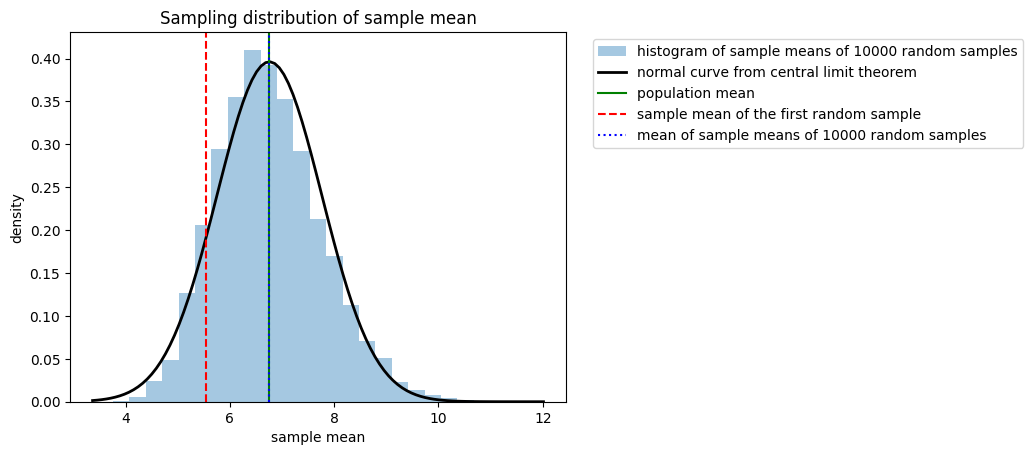

In [ ]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))

**Question:

What insights did you gain from the sampling distribution above?

The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if epa_data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

# **Considerations**

**What are some key takeaways that you learned from this lab?**


Sampling with replacement on a dataset leads to duplicate rows.
Sample means are different from population means due to sampling variability.
The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.



**What findings would you share with others?**


The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.


**What would you convey to external stakeholders?**


Carbon monoxide levels are satisfactory in general.
Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.